## Using IntervalModelEstimator as a Feature Selection Technique for Classification Task

In [1]:
from utils.imodel import IntervalModelEstimator
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier
from dotenv import dotenv_values

### Load Data

In [2]:
config = dotenv_values(".env")
path = config['PATH']
data = pd.read_csv(path)
#data

In [3]:
X = data.iloc[:, 1:]
y = data.iloc[:,0]

### Run IntervalModelEstimator

In [4]:
if __name__ == "__main__":
    classifier = RidgeClassifier()
    clf_hyperparameters =  {'alpha': np.logspace(-5, 5, 20)} 
    evaluator = IntervalModelEstimator(model=classifier, intervals=20, hyperparameters=clf_hyperparameters, method='clf')
    evaluation_results = evaluator.evaluate_intervals(X, y)

### Plot Accuracy scores across intervals 

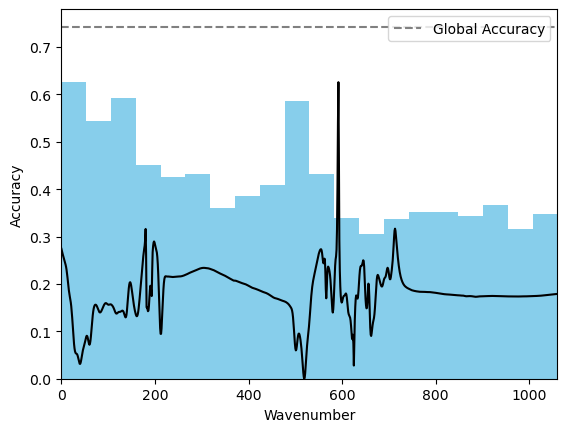

In [5]:
evaluator.plot_metric_values(evaluation_results, X)

The plot above shows that none of the intervals outperformed the full spectrum (global accuracy). It also shows the worst performing intervals (from wavenumber=600 upward). I mostly use this method as a fast way to check which regions to consider for analysis.

Let us rank the intervals 

In [6]:
evals = pd.DataFrame(evaluation_results)
#evals

In [7]:
evals.sort_values(by='metric_value', ascending=False)

,interval,metric_value,interval_samples,estimator,better_than_global
20,full_variables,0.742625,1060,RidgeClassifier(alpha=1e-05),global
0,"[0, 53]",0.625636,53,RidgeClassifier(alpha=1e-05),False
2,"[106, 159]",0.592065,53,RidgeClassifier(alpha=1e-05),False
9,"[477, 530]",0.585961,53,RidgeClassifier(alpha=3.359818286283781e-05),False
1,"[53, 106]",0.544252,53,RidgeClassifier(alpha=3.359818286283781e-05),False
3,"[159, 212]",0.451679,53,RidgeClassifier(alpha=1e-05),False
10,"[530, 583]",0.432350,53,RidgeClassifier(alpha=1e-05),False
5,"[265, 318]",0.432350,53,RidgeClassifier(alpha=3.359818286283781e-05),False
4,"[212, 265]",0.426246,53,RidgeClassifier(alpha=1e-05),False
8,"[424, 477]",0.407935,53,RidgeClassifier(alpha=1e-05),False
